# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [4]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Print the first vew rows of the dataset
print(df.head())
# Print the summary statistics of the dataset
print(df.describe())
# Print the information about the dataset
print(df.info())


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [86]:
# Your code here
# Load the iris dataset

def alpha_func(D, idx):
    # Get the sepal length and width for the given index
    sepal_length = D.loc[idx, 'Sepal.Length']
    sepal_width = D.loc[idx, 'Sepal.Width']
    
    # Calculate mean alpha
    alpha = (sepal_length / sepal_width).mean()
    
    return alpha


Test the code below

In [87]:
alpha_func(df, range(100))

1.815294936355289

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [95]:
rng = np.random.default_rng(0)
alpha_func(df, rng.choice(100, 100, replace=True))


1.8625879222540362

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?
**Just calculating the mean of Sepal.Length gives us a single point estimate. It doesn’t tell us anything about the variability or uncertainty of that estimate. Bootstrap gives a sense of the distribution of the mean estimate (i.e. a better understanding of the data). It constructs confidence intervals, or in other words a range of possible values for the population parameter (in this case, the true average sepal length).**

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!


In [102]:
# Add your code here to set the seed
np.random.seed(0)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [105]:
# Your code here

def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = D.shape[0]
    bootstrap_values = []
    
    for i in range(B):
        idx = rng.choice(D.index, size=n, replace=True)
        value = alpha_func(D, idx)  
        bootstrap_values.append(value)
    
    return np.std(np.array(bootstrap_values))

print(boot_SE(D=df[['Sepal.Width','Sepal.Length']]))

0.03158733085998203


_(vi)_ What is the original mean value of `Sepal.Length`?

In [134]:
# Your code here
sepal_length_om = df['Sepal.Length'].mean()

print(f"Sepal.Length Original Mean: {sepal_length_om:.4f}")

Sepal.Length Original Mean: 5.8433


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [129]:
# Add your code here

B = 1000
boot_samples = []
rng = np.random.default_rng(0)

for i in range(B):
    bootstrap_sample = rng.choice(df['Sepal.Length'], size=n, replace=True)
    boot_samples.append(np.mean(bootstrap_sample))

t_range = np.ptp(np.array(boot_samples))

 # min/max deviation
print("Min/Max Deviation:", t_range)

# mean alpha value
print("Mean Alpha Value:", np.mean(np.array(boot_samples)))

# standard deviation
print("Standard Deviation:", np.std(np.array(boot_samples))) 


Min/Max Deviation: 0.3873333333333342
Mean Alpha Value: 5.842284666666666
Standard Deviation: 0.06649295592099295


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [130]:
# Add your code here

np.percentile(boot_samples, [2.5, 97.5])


array([5.71861667, 5.97471667])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ? 
**The histogram is fairly symmetrical and shows even distribution close to mean alpha value (5.842284), between the values of 5.75 and 5.9. This suggest the validity of the bootstrap samples and the alpha is reliable.**

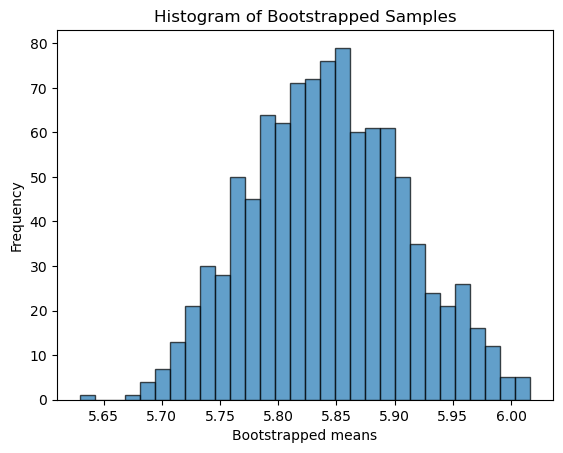

In [131]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_samples, bins=30, edgecolor='k', alpha=0.7)

# Add a title
#Add your code here
ax.set_title('Histogram of Bootstrapped Samples')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Bootstrapped means')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here
# Shipping company should aim at the mean apha lenght (5.84228) with possible diviation with the sugeested deviation values. 

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
